In [1]:
import numpy as np
from tqdm import tqdm
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
c1 = np.loadtxt("c1.txt")
c2 = np.loadtxt("c2.txt")

In [3]:
def split_group_samples(arr_orig, num_split):
    
    sub_sample = arr_orig[np.random.choice(arr_orig.shape[0], arr_orig.shape[0]), :]
    groups = np.split(sub_sample, num_split)
    
    return groups


In [4]:
def calc_CTR(groups):

    session_amount = groups[0].shape[0]
    CTR_list = []
    for i in range(len(groups)):
        click_session_ct = np.count_nonzero(np.sum(groups[i], axis=1))
        CTR = click_session_ct / session_amount
        CTR_list.append(CTR)
    return CTR_list

In [5]:
def calc_abandonment_rate(groups):

    session_amount = groups[0].shape[0]
    arate_list = []
    for i in range(len(groups)):
        click_session_ct = np.count_nonzero(np.sum(groups[i], axis=1))
        arate = (session_amount - click_session_ct) / session_amount
        arate_list.append(arate)
    return arate_list

In [6]:
def calc_stat(arr1, arr2, num_iter, num_split, metric, l1, l2):
    
    split_stats = []
    reject_H0_counter = 0
    
    for i in tqdm(range(num_iter)):
        groups1 = split_group_samples(arr1, num_split)
        groups2 = split_group_samples(arr2, num_split)
        
        metric_result_split1 = metric(groups1)
        metric_result_split2 = metric(groups2)

        split_stats.append((np.mean(metric_result_split1), np.mean(metric_result_split2)))

        t, p_val = stats.ttest_ind(metric_result_split1, metric_result_split2, equal_var=False)
        if t > 1.96:
            reject_H0_counter += 1
    ASL = reject_H0_counter / num_iter
    split_stats = np.array(split_stats)
    
    plt.plot(split_stats[:, 0], label=l1)
    plt.plot(split_stats[:, 1], label=l2)
    plt.xlabel('bootstrap iterations')
    plt.ylabel('metric value')
    plt.legend()
    plt.show()
    return ASL

100%|██████████| 500/500 [02:01<00:00,  4.11it/s]


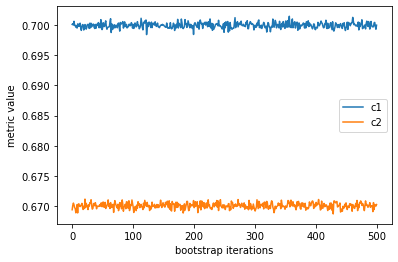

In [7]:
ASL_CTR = calc_stat(c1, c2, 500, 1000, calc_CTR, "c1", "c2")

In [8]:
ASL_CTR

1.0

100%|██████████| 500/500 [02:07<00:00,  3.91it/s]


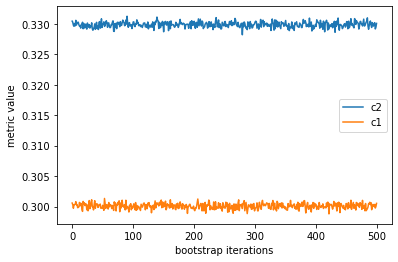

In [9]:
ASL_Abandonment_Rate = calc_stat(c2, c1, 500, 1000, calc_abandonment_rate, "c2", "c1")

In [10]:
ASL_Abandonment_Rate

1.0

Гипотеза H0 для метрики CTR отвергнута во всех случаях, различия в сплитах не обусловлены случайностью. По графику видно, что значения метрики выше для первого сплита, поэтому он лучше. Результаты для "Abandonment_Rate" (метрики в некотором смысле обратной: для того, который хуже, она выше) подтверждают первый эксперимент.